<a href="https://colab.research.google.com/github/sigma-asad/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
%matplotlib inline


## Source links - https://www.kaggle.com/datasets/thedevastator/us-healthcare-readmissions-and-mortality/data


In [ ]:
HOSPITALS_DATA = "Hospitals.csv"
df_hosp = pd.read_csv(HOSPITALS_DATA)

READMISSION_AND_DEATHS_PATH = "Readmissions_and_Deaths_-_Hospital.csv"
df_deaths = pd.read_csv(READMISSION_AND_DEATHS_PATH)

In [ ]:
df_hosp.head(5).T

,0,1,2,3,4
X,-71.049056,-70.468103,-70.9799,-71.2021,-70.9915
Y,42.378509,41.732984,42.5018,42.189,42.0879
OBJECTID,14510,14511,14512,14513,14514
ID,10602129,12602537,3201904,4002062,2502302
NAME,SPAULDING REHABILITATION HOSPITAL,SPAULDING REHABILITATION HOSPITAL CAPE COD,NORTH SHORE MEDICAL CENTER - UNION CAMPUS,NORWOOD HOSPITAL,SIGNATURE HEALTHCARE BROCKTON HOSPITAL
ADDRESS,300 1ST AVE,311 SERVICE ROAD,500 LYNNFIELD STREET,800 WASHINGTON ROAD,680 CENTRE STREET
CITY,BOSTON,SANDWICH,LYNN,NORWOOD,BROCKTON
STATE,MA,MA,MA,MA,MA
ZIP,2129,2537,1904,2062,2302
ZIP4,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE


In [ ]:
df_hosp.shape

(7570, 34)

In [ ]:
df_deaths.head(5).T

,0,1,2,3,4
index,0,1,2,3,4
Provider ID,230100,230121,230118,230121,230133
Hospital Name,TAWAS ST JOSEPH HOSPITAL,MEMORIAL HEALTHCARE,HURON MEDICAL CENTER,MEMORIAL HEALTHCARE,OTSEGO MEMORIAL HOSPITAL
Address,200 HEMLOCK,826 WEST KING STREET,1100 SOUTH VAN DYKE ROAD,826 WEST KING STREET,825 N CENTER AVE
City,TAWAS CITY,OWOSSO,BAD AXE,OWOSSO,GAYLORD
State,MI,MI,MI,MI,MI
ZIP Code,48764,48867,48413,48867,49735
County Name,IOSCO,SHIAWASSEE,HURON,SHIAWASSEE,OTSEGO
Phone Number,9893629301,9897235211,9892699521,9897235211,9897312100
Measure Name,Rate of readmission after discharge from hospi...,Rate of readmission after hip/knee replacement,Pneumonia (PN) 30-Day Readmission Rate,Rate of readmission for stroke patients,Heart failure (HF) 30-Day Mortality Rate


In [ ]:
#lets format the deaths dataframe and perform some calculations

df_deaths["Measure Start Date"] = pd.to_datetime(df_deaths["Measure Start Date"], format = r"%m/%d/%Y")
df_deaths["Measure End Date"] = pd.to_datetime(df_deaths["Measure End Date"], format = r"%m/%d/%Y")

df_deaths["years considered"] = round( (df_deaths["Measure End Date"] - df_deaths["Measure Start Date"]).dt.days / 365 , 1)

In [ ]:
df_deaths["years considered"] = df_deaths["years considered"].astype("int")

In [ ]:
# lets fix the location where it have the \n lets replace them with comma
df_deaths["Location"] = df_deaths["Location"].str.replace("\n", ",")

In [ ]:
# lets extract point that latitude and longitude from location
df_deaths["Location"][0]


'200 HEMLOCK,TAWAS CITY, MI 48764,(44.274911, -83.511002)'

In [ ]:
def get_point(row):
    row = row["Location"]
    row = row.split(",")
    POINT_2 = row[-1].replace(")", "")
    POINT_1 = row[-2].replace("(", "")
    POINT = f'POINT({POINT_1}, {POINT_2})'
    return POINT

In [ ]:

df_deaths["Geo Location"] = df_deaths.apply(get_point, axis = 1)

In [ ]:
def get_address(row):
    address = row["Location"]
    address = address.split(",")
    return ",".join(address[:-2])

In [ ]:
df_deaths["Address"] = df_deaths.apply(get_address, axis = 1)

In [ ]:
df_deaths.head(5).T

,0,1,2,3,4
index,0,1,2,3,4
Provider ID,230100,230121,230118,230121,230133
Hospital Name,TAWAS ST JOSEPH HOSPITAL,MEMORIAL HEALTHCARE,HURON MEDICAL CENTER,MEMORIAL HEALTHCARE,OTSEGO MEMORIAL HOSPITAL
Address,"200 HEMLOCK,TAWAS CITY, MI 48764","826 WEST KING STREET,OWOSSO, MI 48867","1100 SOUTH VAN DYKE ROAD,BAD AXE, MI 48413","826 WEST KING STREET,OWOSSO, MI 48867","825 N CENTER AVE,GAYLORD, MI 49735"
City,TAWAS CITY,OWOSSO,BAD AXE,OWOSSO,GAYLORD
State,MI,MI,MI,MI,MI
ZIP Code,48764,48867,48413,48867,49735
County Name,IOSCO,SHIAWASSEE,HURON,SHIAWASSEE,OTSEGO
Phone Number,9893629301,9897235211,9892699521,9897235211,9897312100
Measure Name,Rate of readmission after discharge from hospi...,Rate of readmission after hip/knee replacement,Pneumonia (PN) 30-Day Readmission Rate,Rate of readmission for stroke patients,Heart failure (HF) 30-Day Mortality Rate


<Axes: >

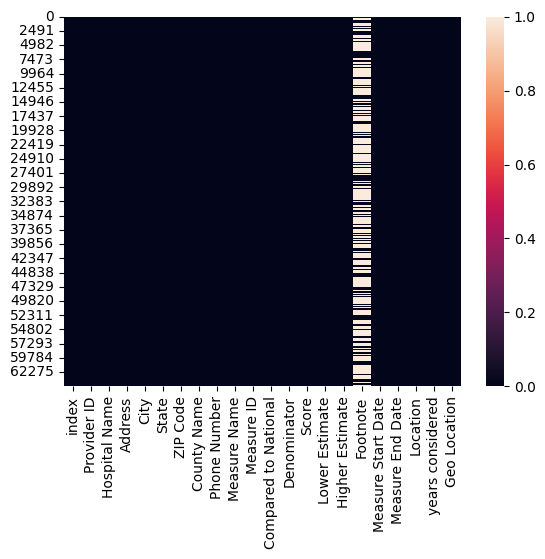

In [ ]:
# lets see if there are any empty values
sns.heatmap(df_deaths.isna())

In [ ]:
# we can clearly see there are lot of empty values in the foot note lets drop this column
new_cols = list(df_deaths.columns)
new_cols.remove("Footnote")

df_deaths = df_deaths[new_cols]

<Axes: >

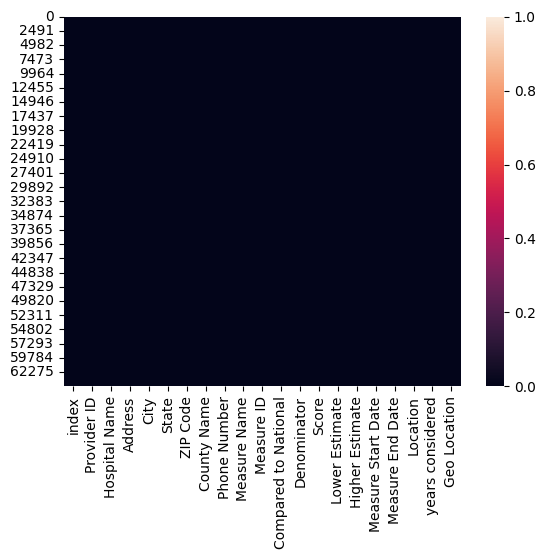

In [ ]:
# again lets see if there are any more empty values
sns.heatmap(df_deaths.isna())

In [ ]:
# lets curate the df_hospital

df_hosp.describe()

,X,Y,OBJECTID,ID,ZIP,POPULATION,LATITUDE,LONGITUDE,NAICS_CODE,ST_FIPS,TTL_STAFF,BEDS
count,7570.000000,7570.000000,7570.000000,7.570000e+03,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.0,7570.000000
mean,-92.387417,37.331745,11287.911889,2.520163e+07,53609.916645,42.392999,37.331744,-92.387417,622140.951123,29.471995,-999.0,48.259709
std,15.995659,5.775099,2189.726558,3.899382e+07,27518.769850,370.336773,5.775099,15.995660,66.107596,16.303173,0.0,362.621724
min,-176.640263,-14.290242,7497.000000,4.000000e+00,605.000000,-999.000000,-14.290242,-176.640263,622110.000000,1.000000,-999.0,-999.000000
25%,-98.199507,33.463963,9392.250000,3.974885e+06,32028.000000,25.000000,33.463963,-98.199507,622110.000000,17.000000,-999.0,25.000000
50%,-90.074141,37.976913,11288.000000,9.640840e+06,54966.000000,65.000000,37.976913,-90.074141,622110.000000,29.000000,-999.0,66.000000
75%,-81.774617,41.322441,13183.750000,2.241059e+07,76781.000000,178.000000,41.322441,-81.774617,622110.000000,44.000000,-999.0,178.000000
max,145.724472,71.292847,15081.000000,1.676842e+08,99929.000000,1592.000000,71.292847,145.724472,622310.000000,78.000000,-999.0,1592.000000


In [ ]:
# there are some obersvations which we can make from above described data
# 1. there wont be negative population
# 2. there cant be negative beds
# 3. there cant be negative TTL_STAFF (this column can be dropped because its filled with all the same values)

df_hosp["BEDS"] = df_hosp["BEDS"].replace(-999, 0)
df_hosp["POPULATION"] = df_hosp["POPULATION"].replace(-999, 0)

all_cols = list(df_hosp.columns)
all_cols.remove("TTL_STAFF")
df_hosp = df_hosp[all_cols]

In [ ]:
df_hosp.describe(include="O").T

,count,unique,top,freq
NAME,7570,7296,MEMORIAL HOSPITAL,12
ADDRESS,7570,7435,100 HOSPITAL DRIVE,8
CITY,7570,3372,HOUSTON,70
STATE,7570,57,TX,798
ZIP4,7570,109,NOT AVAILABLE,7459
TELEPHONE,7570,6262,NOT AVAILABLE,1084
TYPE,7570,10,GENERAL ACUTE CARE,4511
STATUS,7570,2,OPEN,7216
COUNTY,7570,1602,LOS ANGELES,131
COUNTYFIPS,7570,2583,06037,131


## EDA on Hospitals data after curating!

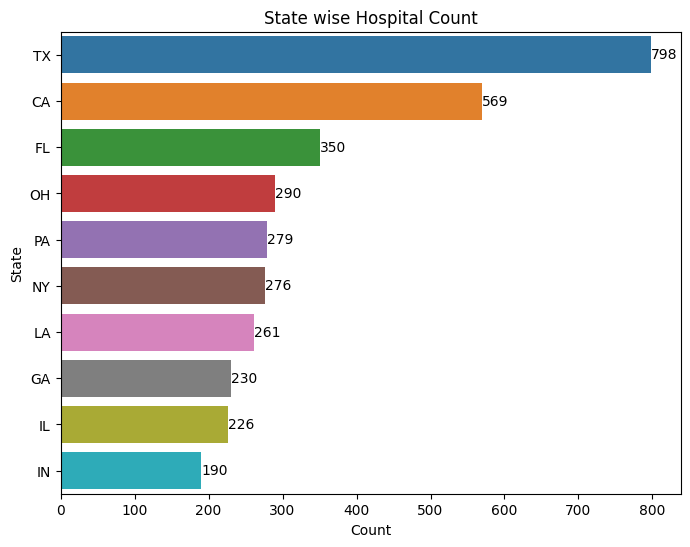

In [ ]:
# count of hospitals by state

hosp_count_state_wise = df_hosp.groupby(by = ["STATE"])["NAME"].count().reset_index().sort_values( by = ["NAME"], ascending = False)
plt.figure(figsize=(8, 6))
ax = sns.barplot(data = hosp_count_state_wise.head(10), x = "NAME", y = "STATE")
ax.bar_label(ax.containers[0])
plt.title('State wise Hospital Count')
plt.xlabel('Count')
plt.ylabel('State')
# plt.legend()
plt.show()

The state with the most hospitals is Texas, with 798 hospitals. California is in second place, with 569 hospitals. Florida is in third place, with 350 hospitals. Ohio, Pennsylvania, and New York all have between 260 and 290 hospitals. Louisiana, Georgia, and Illinois all have between 220 and 230 hospitals. Indiana has 190 hospitals.

The chart is not labeled with a date, so it is impossible to say whether the number of hospitals has changed over time. However, the fact that Texas, California, and Florida have the most hospitals suggests that these states may have larger populations or more densely populated areas than other states.

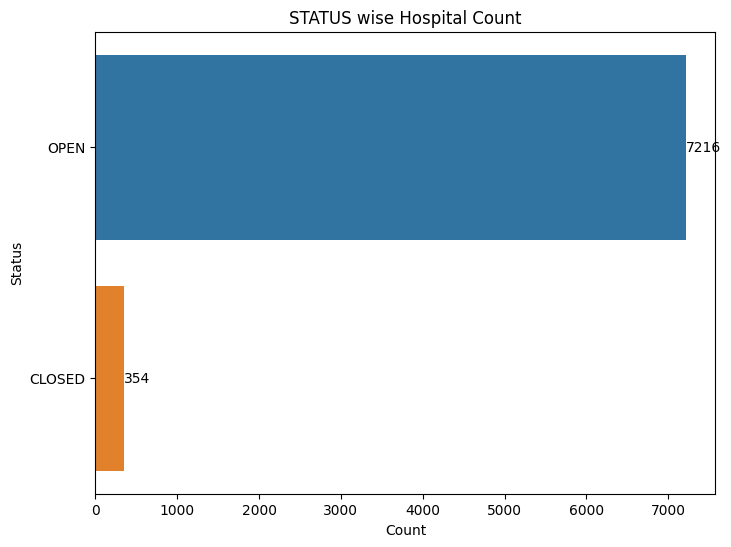

In [ ]:
# count of hospitals by state

status_wise_count = df_hosp.groupby(by = ["STATUS"])["NAME"].count().reset_index().sort_values( by = ["NAME"], ascending = False)
plt.figure(figsize=(8, 6))
ax = sns.barplot(data = status_wise_count, x = "NAME", y = "STATUS")
ax.bar_label(ax.containers[0])
plt.title('STATUS wise Hospital Count')
plt.xlabel('Count')
plt.ylabel('Status')
# plt.legend()
plt.show()

Status: This section shows two labels, "OPEN" and "CLOSED".
Count: This section has a numerical axis ranging from 0 to 7000, with tick marks at every 1000 units. Below the axis, there are two bars, one labeled "OPEN" and another labeled "CLOSED".

There are more OPEN hospitals than closed one's in the dataset as of this year

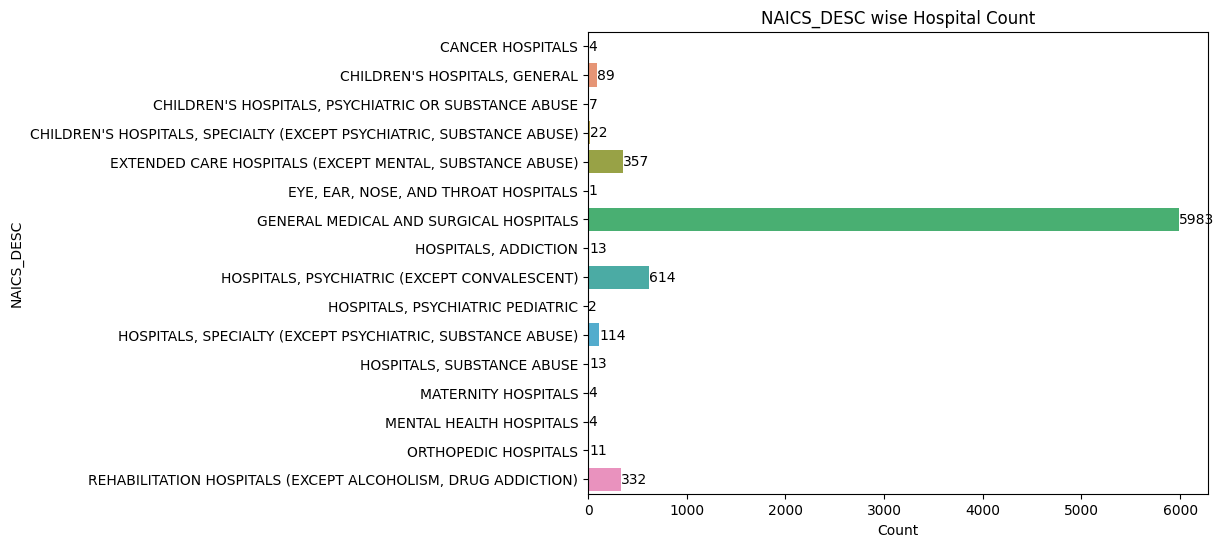

In [ ]:
# naics description wise count of hospitals
status_wise_count = df_hosp.groupby(by = ["NAICS_DESC"])["NAME"].count().reset_index()#.sort_values( by = ["NAME"], ascending = False)
plt.figure(figsize=(8, 6))
ax = sns.barplot(data = status_wise_count, x = "NAME", y = "NAICS_DESC")
ax.bar_label(ax.containers[0])
plt.title('NAICS_DESC wise Hospital Count')
plt.xlabel('Count')
plt.ylabel('NAICS_DESC')
# plt.legend()
plt.show()


Here's a breakdown of the information I can see:

> Hospital types:
* Children's Hospitals, General: 89
* Children's Hospitals, Specialty (Except Psychiatric, Substance Abuse): 22
* Children's Hospitals, Psychiatric or Substance Abuse: 17

> Other hospital types:
* General Medical and Surgical Hospitals: 5983
* Hospitals, Psychiatric (Except Convalescent): 614
* Hospitals, Specialty (Except Psychiatric, Substance Abuse): 114

There are also several other categories listed on the chart, but they all have negative values. This could indicate that there are no hospitals of those types in the data, or that there was an error in recording the data.

* The number of general children's hospitals (89) is much smaller than the number of general medical and surgical hospitals (5983).

## EDA on Deaths data after curating!

In [ ]:
df_deaths.describe()

,index,Provider ID,ZIP Code,Phone Number,years considered
count,64764.000000,64764.000000,64764.000000,6.476400e+04,64764.000000
mean,32381.500000,266295.217250,53713.003243,5.842244e+09,2.857143
std,18695.900754,155729.601498,26916.617580,2.331479e+09,0.515083
min,0.000000,10001.000000,603.000000,9.369338e+08,1.000000
25%,16190.750000,140172.000000,32803.000000,3.869175e+09,3.000000
50%,32381.500000,251334.500000,55015.000000,6.037655e+09,3.000000
75%,48572.250000,390137.000000,75701.000000,7.877233e+09,3.000000
max,64763.000000,670108.000000,99929.000000,9.898943e+09,3.000000


In [ ]:
df_deaths.describe(include="O").T

,count,unique,top,freq
Hospital Name,64764,4434,MEMORIAL HOSPITAL,196
Address,64764,4625,"481 INTERSTATE DRIVE,MANCHESTER, TN 37355",28
City,64764,2875,CHICAGO,364
State,64764,55,TX,5096
County Name,64582,1524,LOS ANGELES,1134
Measure Name,64764,14,Rate of readmission after discharge from hospi...,4626
Measure ID,64764,14,READM_30_HOSP_WIDE,4626
Compared to National,64764,5,No Different than the National Rate,39360
Denominator,64764,2772,Not Available,22979
Score,64764,259,Not Available,22979


In [ ]:
# lets see what values score have since it is coming in object type we have to type cast it to the floating value to calculate the total
df_deaths["Score"].unique()

array(['13.9', '4.0', '16.7', '11.5', '13.4', '20.6', '12.8', '6.9',
       '23.9', '8.2', '16.8', '17.8', '18.5', '16.0', 'Not Available',
       '7.6', '15.5', '20.8', '18.0', '21.9', '5.7', '14.9', '16.4',
       '20.9', '13.2', '3.4', '14.4', '8.5', '16.5', '19.4', '20.7',
       '4.9', '12.1', '17.4', '21.5', '3.8', '20.5', '9.0', '14.3',
       '11.7', '15.8', '14.2', '4.2', '11.6', '22.5', '4.4', '5.6', '4.3',
       '26.9', '16.1', '18.4', '3.2', '15.7', '13.8', '14.7', '17.2',
       '12.7', '10.0', '12.5', '19.8', '18.6', '14.0', '17.0', '18.3',
       '9.5', '13.5', '3.3', '11.3', '15.4', '17.1', '15.2', '7.3', '7.2',
       '10.8', '18.9', '13.6', '20.4', '17.7', '14.8', '9.3', '4.6',
       '8.7', '22.4', '12.9', '23.0', '19.1', '7.0', '10.1', '16.9',
       '23.3', '4.1', '15.9', '6.4', '9.1', '5.3', '18.7', '17.3', '20.1',
       '21.3', '15.3', '15.6', '4.7', '19.5', '17.9', '14.5', '20.3',
       '15.1', '19.0', '10.5', '21.6', '16.3', '19.6', '11.1', '5.0',
       '12

In [ ]:
# as we can see there is a value called Not Available we have to repalce that with the 0
df_deaths.loc[df_deaths[df_deaths["Score"]=='Not Available'].index,"Score"] = "0.0"

In [ ]:
df_deaths["Score"] = df_deaths["Score"].astype("float")

<ipython-input-110-afa2738a8c49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deaths["Score"] = df_deaths["Score"].astype("float")


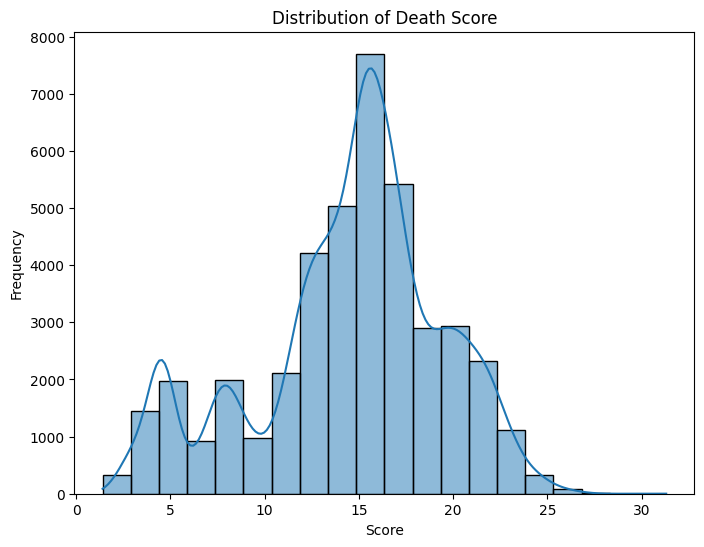

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_deaths[df_deaths['Score']>0]["Score"], bins=20, kde = True)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Death Score greater than zero')
plt.show()

Here are some of the key features of the chart:

* The most common death scores are around 10 and 15. There are many more deaths with these scores than any other score.
The death scores range from 0 to 30. There are very few deaths with scores below 5 or above 25.
* The distribution of death scores is roughly symmetrical. There are about as many deaths with scores slightly above 10 as there are deaths with scores slightly below 10.
* There are a few outliers, with scores far from the main cluster of data points. These outliers could represent deaths with unusual characteristics.

It is important to note that I cannot interpret the meaning of the death scores without more information. However, the chart does provide a way to visualize the distribution of deaths in the United States.

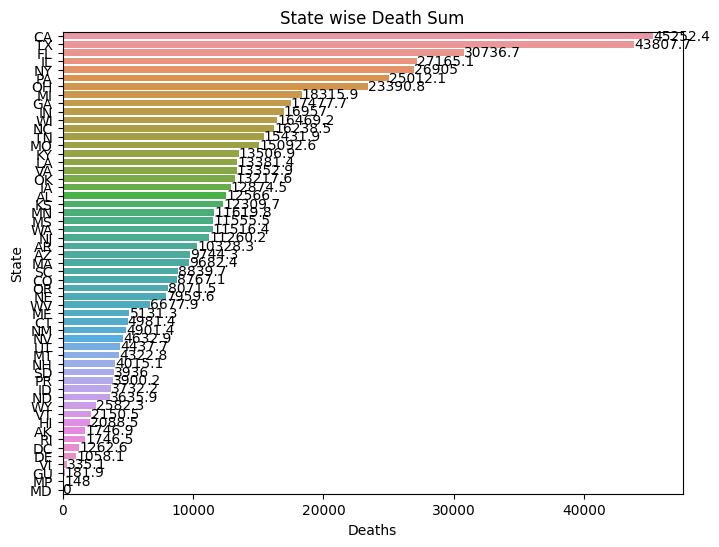

In [ ]:
# lets count the total number of deaths statewise

death_sum_state_wise = df_deaths.groupby(by = ["State"])["Score"].sum().reset_index().sort_values( by = ["Score"], ascending = False)
plt.figure(figsize=(8, 6))
ax = sns.barplot(data = death_sum_state_wise, x = "Score", y = "State")
ax.bar_label(ax.containers[0])
plt.title('State wise Death Sum')
plt.xlabel('Deaths')
plt.ylabel('State')
# plt.legend()
plt.show()

California and Texas are the top 2 states which have more death count compare to all other 48 states of the USA, next tops is the florida and last stands maryland State with no deaths records when this dataset was collected.

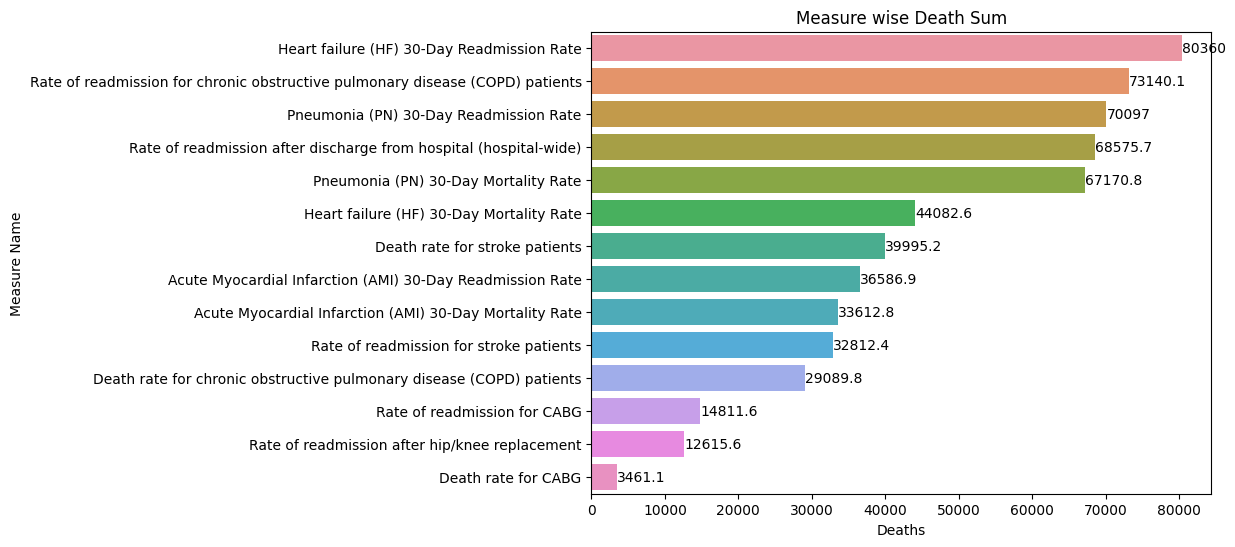

In [ ]:
# lets count the total number of deaths Measure name wise

death_sum_measure_name_wise = df_deaths.groupby(by = ["Measure Name"])["Score"].sum().reset_index().sort_values( by = ["Score"], ascending = False)
plt.figure(figsize=(8, 6))
ax = sns.barplot(data = death_sum_measure_name_wise, x = "Score", y = "Measure Name")
ax.bar_label(ax.containers[0])
plt.title('Measure wise Death Sum')
plt.xlabel('Deaths')
plt.ylabel('Measure Name')
# plt.legend()
plt.show()


* The leading cause of death in the United States is heart failure (HF), with a rate of 80,360 deaths per year. This is represented by the light blue bar at the top of the graph.
* The second leading cause of death is chronic obstructive pulmonary disease (COPD), with a rate of 73,140.1 deaths per year. This is represented by the dark blue bar below the heart failure bar.
* Pneumonia is the third leading cause of death, with a rate of 70,097 deaths per year. This is represented by the light green bar below the COPD bar.
* The rate of death from all causes is shown at the bottom of the graph as a horizontal line.

## Combining the two datasets

In [ ]:
df = df_deaths.merge(df_hosp, left_on = "Hospital Name", right_on = "NAME")

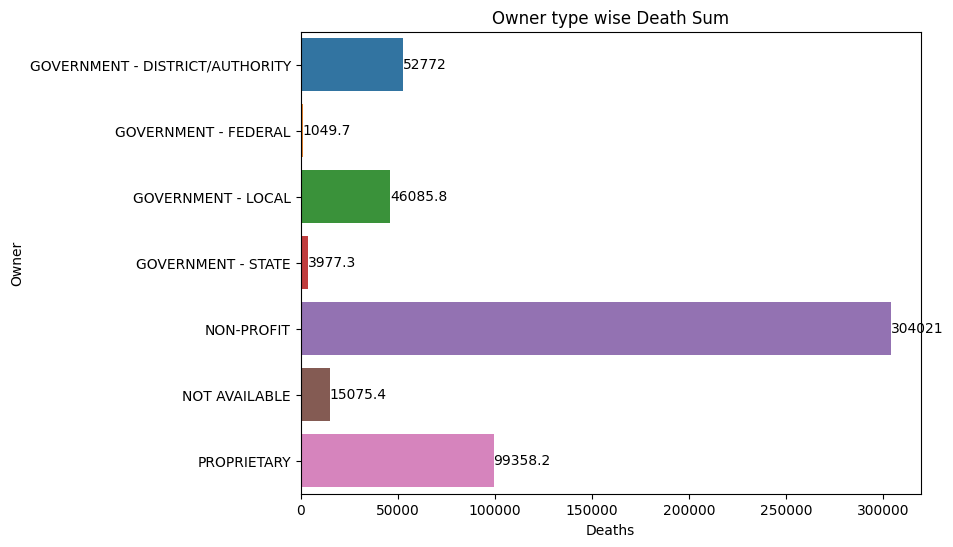

In [ ]:
# owner wise the deaths sum

temp_group = df.groupby(by = ["OWNER"])["Score"].sum().reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(data = temp_group, x = "Score", y = "OWNER")
ax.bar_label(ax.containers[0])
plt.title('Owner type wise Death Sum')
plt.xlabel('Deaths')
plt.ylabel('Owner')
# plt.legend()
plt.show()

* Non-profit healthcare facilities account for the highest number of deaths, at over 304,000.
* Proprietary healthcare facilities are next, with nearly 99,358 deaths.
* The number of deaths attributed to government-owned facilities varies. Government-local facilities have the most deaths among government owners, at over 46,000, while Government-federal has the least at under 1,100.
* The category “Not Available” has over 15,000 deaths.

In [ ]:
df.head(5).T

,0,1,2,3,4
index,0,10,36,42,43
Provider ID,230100,230100,230100,230100,230100
Hospital Name,TAWAS ST JOSEPH HOSPITAL,TAWAS ST JOSEPH HOSPITAL,TAWAS ST JOSEPH HOSPITAL,TAWAS ST JOSEPH HOSPITAL,TAWAS ST JOSEPH HOSPITAL
Address,"200 HEMLOCK,TAWAS CITY, MI 48764","200 HEMLOCK,TAWAS CITY, MI 48764","200 HEMLOCK,TAWAS CITY, MI 48764","200 HEMLOCK,TAWAS CITY, MI 48764","200 HEMLOCK,TAWAS CITY, MI 48764"
City,TAWAS CITY,TAWAS CITY,TAWAS CITY,TAWAS CITY,TAWAS CITY
State,MI,MI,MI,MI,MI
ZIP Code,48764,48764,48764,48764,48764
County Name,IOSCO,IOSCO,IOSCO,IOSCO,IOSCO
Phone Number,9893629301,9893629301,9893629301,9893629301,9893629301
Measure Name,Rate of readmission after discharge from hospi...,Pneumonia (PN) 30-Day Readmission Rate,Heart failure (HF) 30-Day Readmission Rate,Rate of readmission after hip/knee replacement,Rate of readmission for stroke patients


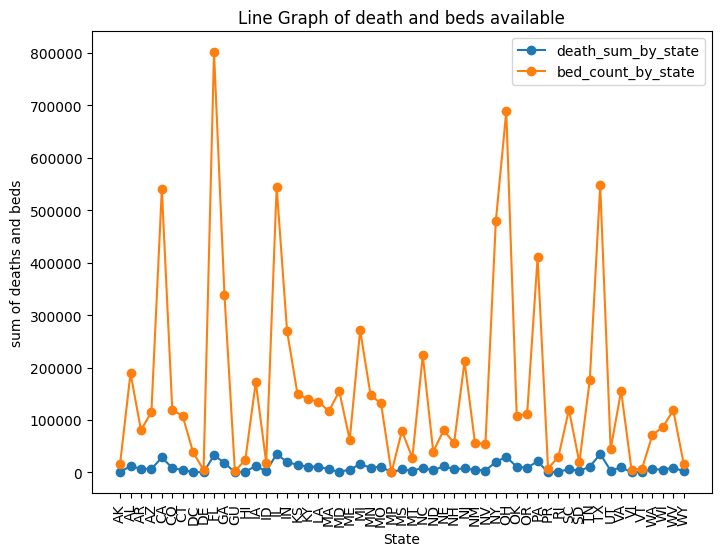

In [ ]:
# Beds vs Death

temp_death_score = df.groupby(by = ["STATE"])["Score"].sum().reset_index()
temp_bed_score = df.groupby(by = ["STATE"])["BEDS"].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.plot(temp_death_score['STATE'].astype('str'),
         temp_death_score['Score'], marker='o', linestyle='-', label = "death_sum_by_state")
plt.plot(temp_bed_score['STATE'].astype('str'),
         temp_bed_score['BEDS'], marker='o', linestyle='-', label = "bed_count_by_state")
plt.title('Line Graph of death and beds available')
plt.xlabel('State')
plt.ylabel('sum of deaths and beds')
plt.xticks(rotation = 90)
plt.legend(loc = "upper right")
# plt.grid(True)
plt.show()

The deaths and bed are linearly proportional that means we can conclude that if there are more beds available in an hospital there is likely that the hospital might get more persons admitted and there are chances to for the deaths as well.

In [ ]:
pd.pivot_table(data=df, index= ["State"], values = ["BEDS", "Score", "POPULATION"], columns = ["NAICS_DESC"], aggfunc = "sum")

BEDS  \
NAICS_DESC CHILDREN'S HOSPITALS, GENERAL   
State                                      
AK                                   NaN   
AL                                   NaN   
AR                                3920.0   
AZ                                   NaN   
CA                               11242.0   
CO                                   NaN   
CT                                2618.0   
DC                                   NaN   
DE                                   NaN   
FL                               21868.0   
GA                                   NaN   
GU                                   NaN   
HI                                   NaN   
IA                                   NaN   
ID                                   NaN   
IL                                   NaN   
IN                                6440.0   
KS                                   NaN   
KY                                   NaN   
LA                                   NaN   
MA                                   NaN   
MD                                   NaN   
ME                                   NaN   
MI                                3192.0   
MN                                   NaN   
MO                                6440.0   
MP                                   NaN   
MS                                   NaN   
MT                                   NaN   
NC                                   NaN   
ND                                   NaN   
NE                                2030.0   
NH                                   NaN   
NJ                                   NaN   
NM                                   NaN   
NV                                   NaN   
NY                                   NaN   
OH                                   NaN   
OK                                   NaN   
OR                                   NaN   
PA                                7924.0   
PR                                   NaN   
RI                                   NaN   
SC                                   NaN   
SD                                   NaN   
TN                                   NaN   
TX                                   NaN   
UT                                   NaN   
VA                                   NaN   
VI                                   NaN   
VT                                   NaN   
WA                                3500.0   
WI                                7924.0   
WV                                6440.0   
WY                                   NaN   

                                                                     \
NAICS_DESC EXTENDED CARE HOSPITALS (EXCEPT MENTAL, SUBSTANCE ABUSE)   
State                                                                 
AK                                                        NaN         
AL                                                        NaN         
AR                                                        NaN         
AZ                                                        NaN         
CA                                                        NaN         
CO                                                        NaN         
CT                                                        NaN         
DC                                                        NaN         
DE                                                        NaN         
FL                                                        NaN         
GA                                                        NaN         
GU                                                        NaN         
HI                                                        NaN         
IA                                                        NaN         
ID                                                        NaN         
IL                                                        NaN         
IN                                                        NaN         
KS                                                      504.0  

the code is creating a pivot table that shows the sum of "BEDS," "Score," and "POPULATION" for each combination of state and NAICS_DESC in the original DataFrame. The resulting table will have states as rows, NAICS_DESC as columns, and the sum of the specified columns as values in the table.

where GENERAL MEDICAL AND SURGICAL HOSPITALS have more deaths, beds and have more inpatient count.

In [ ]:
grouped = df[df["Score"]>0].groupby('Provider ID')
score_list = []
for name, group in grouped:
    score_list.append(group['Score'].tolist())

fvalue, pvalue = stats.f_oneway(*score_list)

In [ ]:
print("F-value:", fvalue)
print("p-value:", pvalue)

F-value: 0.5171893484213761
p-value: 0.9999999999999999



The ANOVA test results indicate that there is no notable contrast in the mortality rate and hospital readmission rate among healthcare providers in the US. With a obtained p-value of 0.99, considerably exceeding the conventional significance levels like 0.05 or 0.01, we lack evidence to reject the null hypothesis. This outcome suggests an absence of significant distinctions between the various healthcare provider groups.

The F-value, serving as the test statistic measuring the ratio of disparity among groups to that within groups, reflects the extent of differences among groups relative to differences within them. Given the relatively low obtained F-value, it can be deduced that the variability within groups surpasses the variability observed between groups.